In [1]:
import warnings

## 1. Data Understanding and Exploration

In [2]:
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [3]:
dataset = pd.read_csv("Boombikes.csv")

In [4]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
dataset.shape

(730, 16)

In [6]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
dataset.loc[(dataset['season']==1),'season'] = 'spring'
dataset.loc[(dataset['season']==2),'season'] = 'summer'
dataset.loc[(dataset['season']==3),'season'] = 'fall'
dataset.loc[(dataset['season']==4),'season'] = 'winter'

In [10]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [11]:
def object_map_mnth(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [12]:
dataset[['mnth']]=dataset[['mnth']].apply(object_map_mnth)

In [13]:
def string_map_weekday(x):
    return x.map({6:'Sat',0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri'})

In [14]:
dataset[['weekday']]=dataset[['weekday']].apply(string_map_weekday)

In [15]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon    105
Sat    105
Sun    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: count, dtype: int64

In [16]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [17]:
dataset.loc[(dataset['weathersit']==1),'weathersit'] = 'A'
dataset.loc[(dataset['weathersit']==2),'weathersit'] = 'B'
dataset.loc[(dataset['weathersit']==3),'weathersit'] = 'C'


## Data Visualization

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='temp', ylabel='Density'>

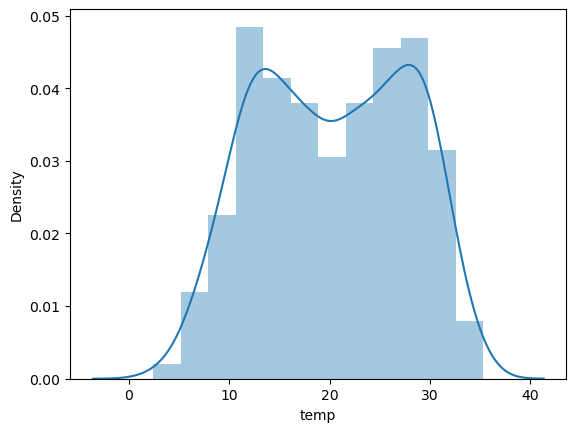

In [19]:
sns.distplot(dataset['temp'])

<Axes: xlabel='atemp', ylabel='Density'>

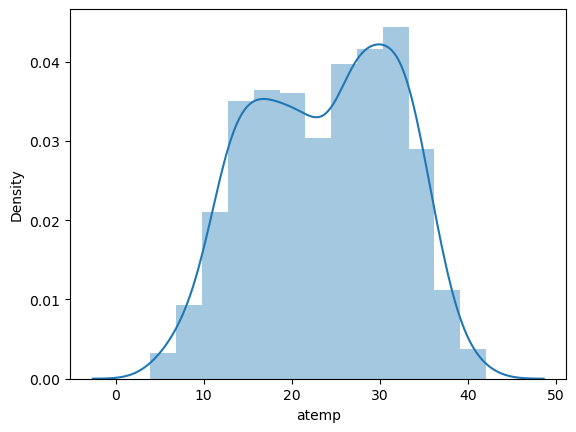

In [20]:
sns.distplot(dataset['atemp'])

<Axes: xlabel='windspeed', ylabel='Density'>

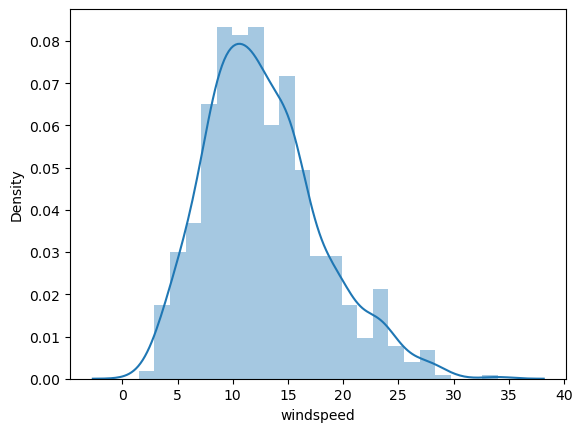

In [21]:
sns.distplot(dataset['windspeed'])

<Axes: xlabel='cnt', ylabel='Density'>

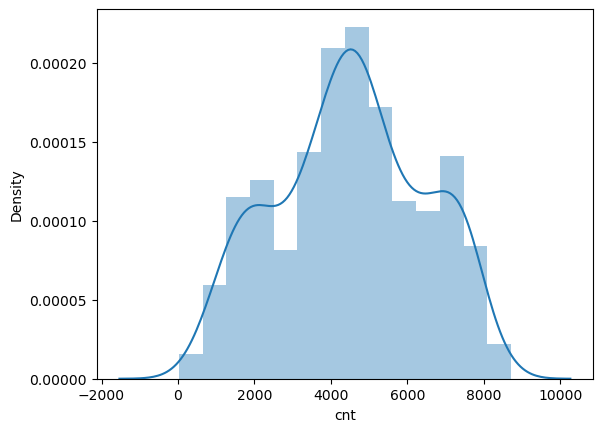

In [22]:
#Target variable : count of total rental bikes including both casual and registered
sns.distplot(dataset['cnt'])

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [24]:
dataset_categorical=dataset.select_dtypes(['object'])

In [25]:
dataset_categorical

,dteday,season,mnth,weekday,weathersit
0,01-01-2018,spring,Jan,Sat,B
1,02-01-2018,spring,Jan,Sun,B
2,03-01-2018,spring,Jan,Mon,A
3,04-01-2018,spring,Jan,Tue,A
4,05-01-2018,spring,Jan,Wed,A
...,...,...,...,...,...
725,27-12-2019,spring,Dec,Thu,B
726,28-12-2019,spring,Dec,Fri,B
727,29-12-2019,spring,Dec,Sat,B
728,30-12-2019,spring,Dec,Sun,A


<Axes: xlabel='yr', ylabel='cnt'>

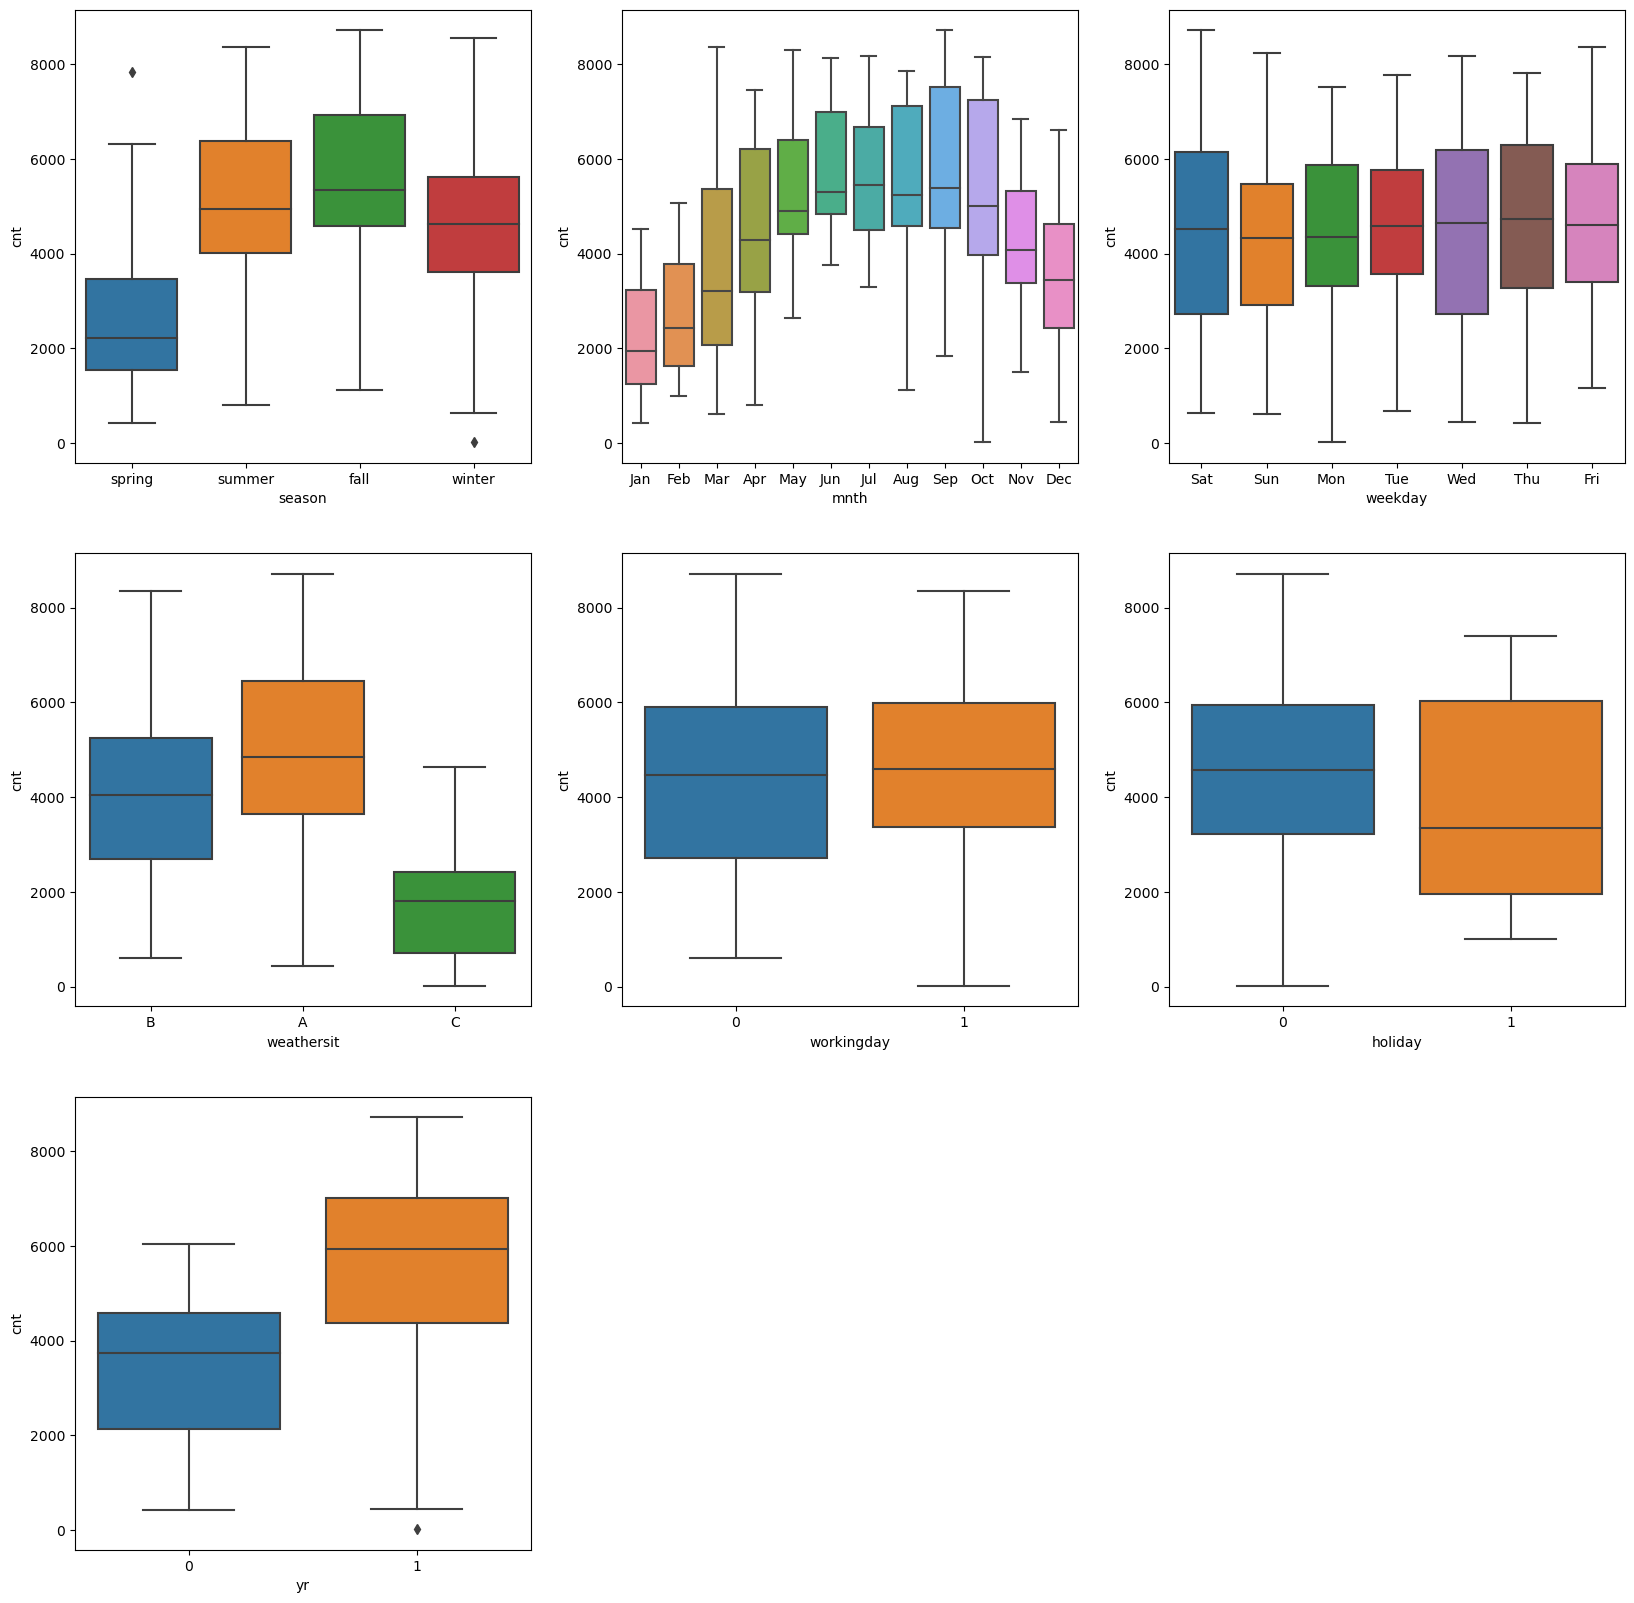

In [26]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='holiday',y='cnt',data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='yr',y='cnt',data=dataset)


In [27]:
intVarlist=["casual","registered","cnt"]
for var in intVarlist :
    dataset[var]=dataset[var].astype("float")

In [28]:
dataset_numeric=dataset.select_dtypes(include=["float64"])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


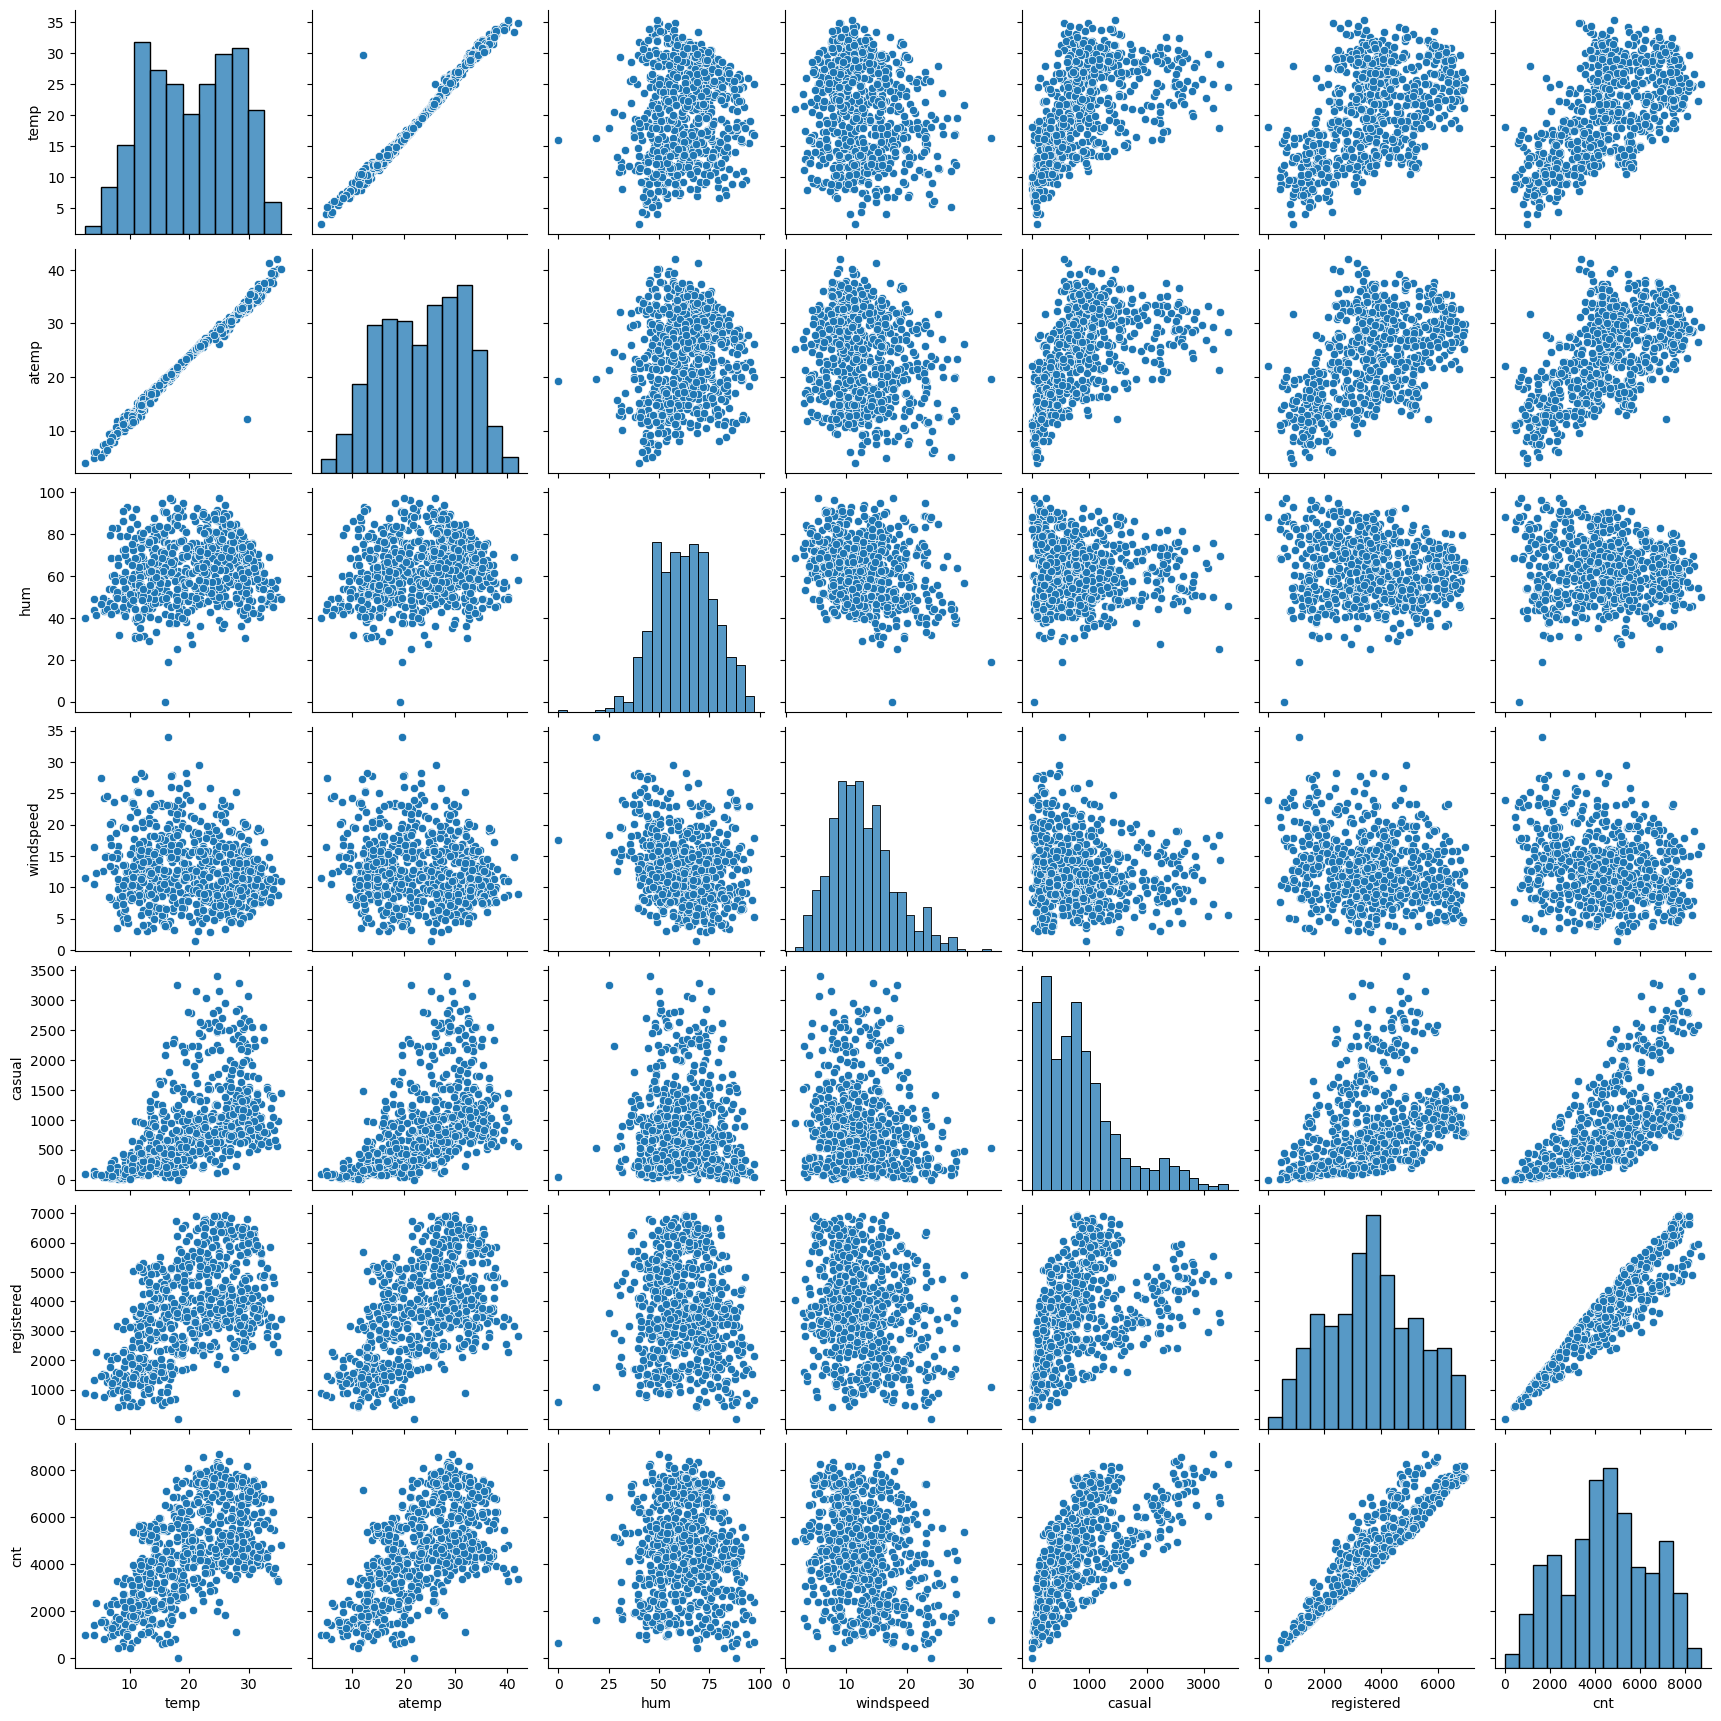

In [29]:
sns.pairplot(dataset_numeric)


In [30]:
corr = dataset_numeric.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

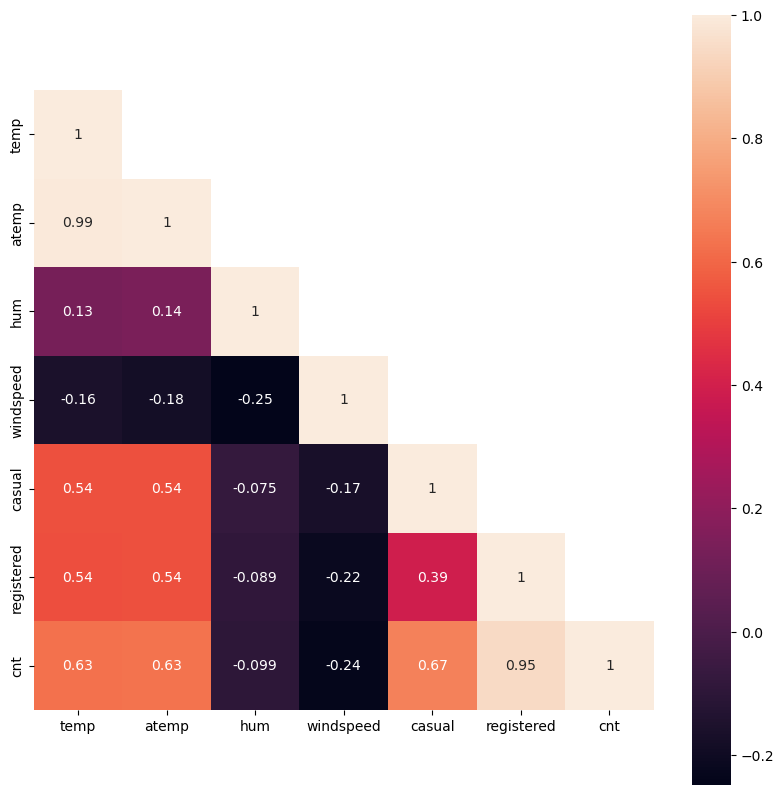

In [31]:
#heatmap
mask=np.array(corr)
mask[np.tril_indices_from(mask)]= False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,mask=mask,vmax=1,annot=True,square=True)

In [32]:
dataset.drop('atemp',axis=1,inplace=True)

In [33]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,02-01-2018,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,03-01-2018,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,04-01-2018,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,05-01-2018,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## Data Preparation

In [34]:
dataset_categorical

,dteday,season,mnth,weekday,weathersit
0,01-01-2018,spring,Jan,Sat,B
1,02-01-2018,spring,Jan,Sun,B
2,03-01-2018,spring,Jan,Mon,A
3,04-01-2018,spring,Jan,Tue,A
4,05-01-2018,spring,Jan,Wed,A
...,...,...,...,...,...
725,27-12-2019,spring,Dec,Thu,B
726,28-12-2019,spring,Dec,Fri,B
727,29-12-2019,spring,Dec,Sat,B
728,30-12-2019,spring,Dec,Sun,A


In [35]:
dataset_categorical.drop('dteday',axis=1,inplace=True)

In [36]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A


In [37]:
dataset_dummies=pd.get_dummies(dataset_categorical,drop_first=True,dtype=int)

In [38]:
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
#Drop categorical variable columns
dataset=dataset.drop(list(dataset_categorical.columns),axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,02-01-2018,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,03-01-2018,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,04-01-2018,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,05-01-2018,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,28-12-2019,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,29-12-2019,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,30-12-2019,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [40]:
#concatenate dummies with dataset
dataset=pd.concat([dataset,dataset_dummies],axis=1)
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,01-01-2018,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,1,0
1,2,02-01-2018,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,1,0,0,0,1,0
2,3,03-01-2018,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,05-01-2018,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0


In [41]:
dataset=dataset.drop(['instant','dteday'],axis=1,inplace= False)

In [42]:
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


## Model Building and Evaluation

In [43]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [44]:
#Split into test and train datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=100)

In [104]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.280402,0.951776,0.864243,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.294422,0.899220,0.827658,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.290765,0.446145,0.465255,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.110332,0.203869,0.204096,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.340750,0.444701,0.482973,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.309357,0.812446,0.764151,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.298994,0.903552,0.832835,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.041756,0.253826,0.218017,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.083206,0.352873,0.312586,0,...,0,0,0,1,0,0,0,0,1,0


In [102]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.096312,0.376697,1,0,...,0,0,0,0,1,0,0,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.650923,0.069510,0.426394,0.420445,0,1,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0,0,...,1,0,0,0,0,0,0,1,1,0


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaler= MinMaxScaler()

In [48]:
#apply scaler to all variables except dummies
var=["temp","hum","windspeed","casual","registered","cnt"]
df_train[var]=scaler.fit_transform(df_train[var])

In [103]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


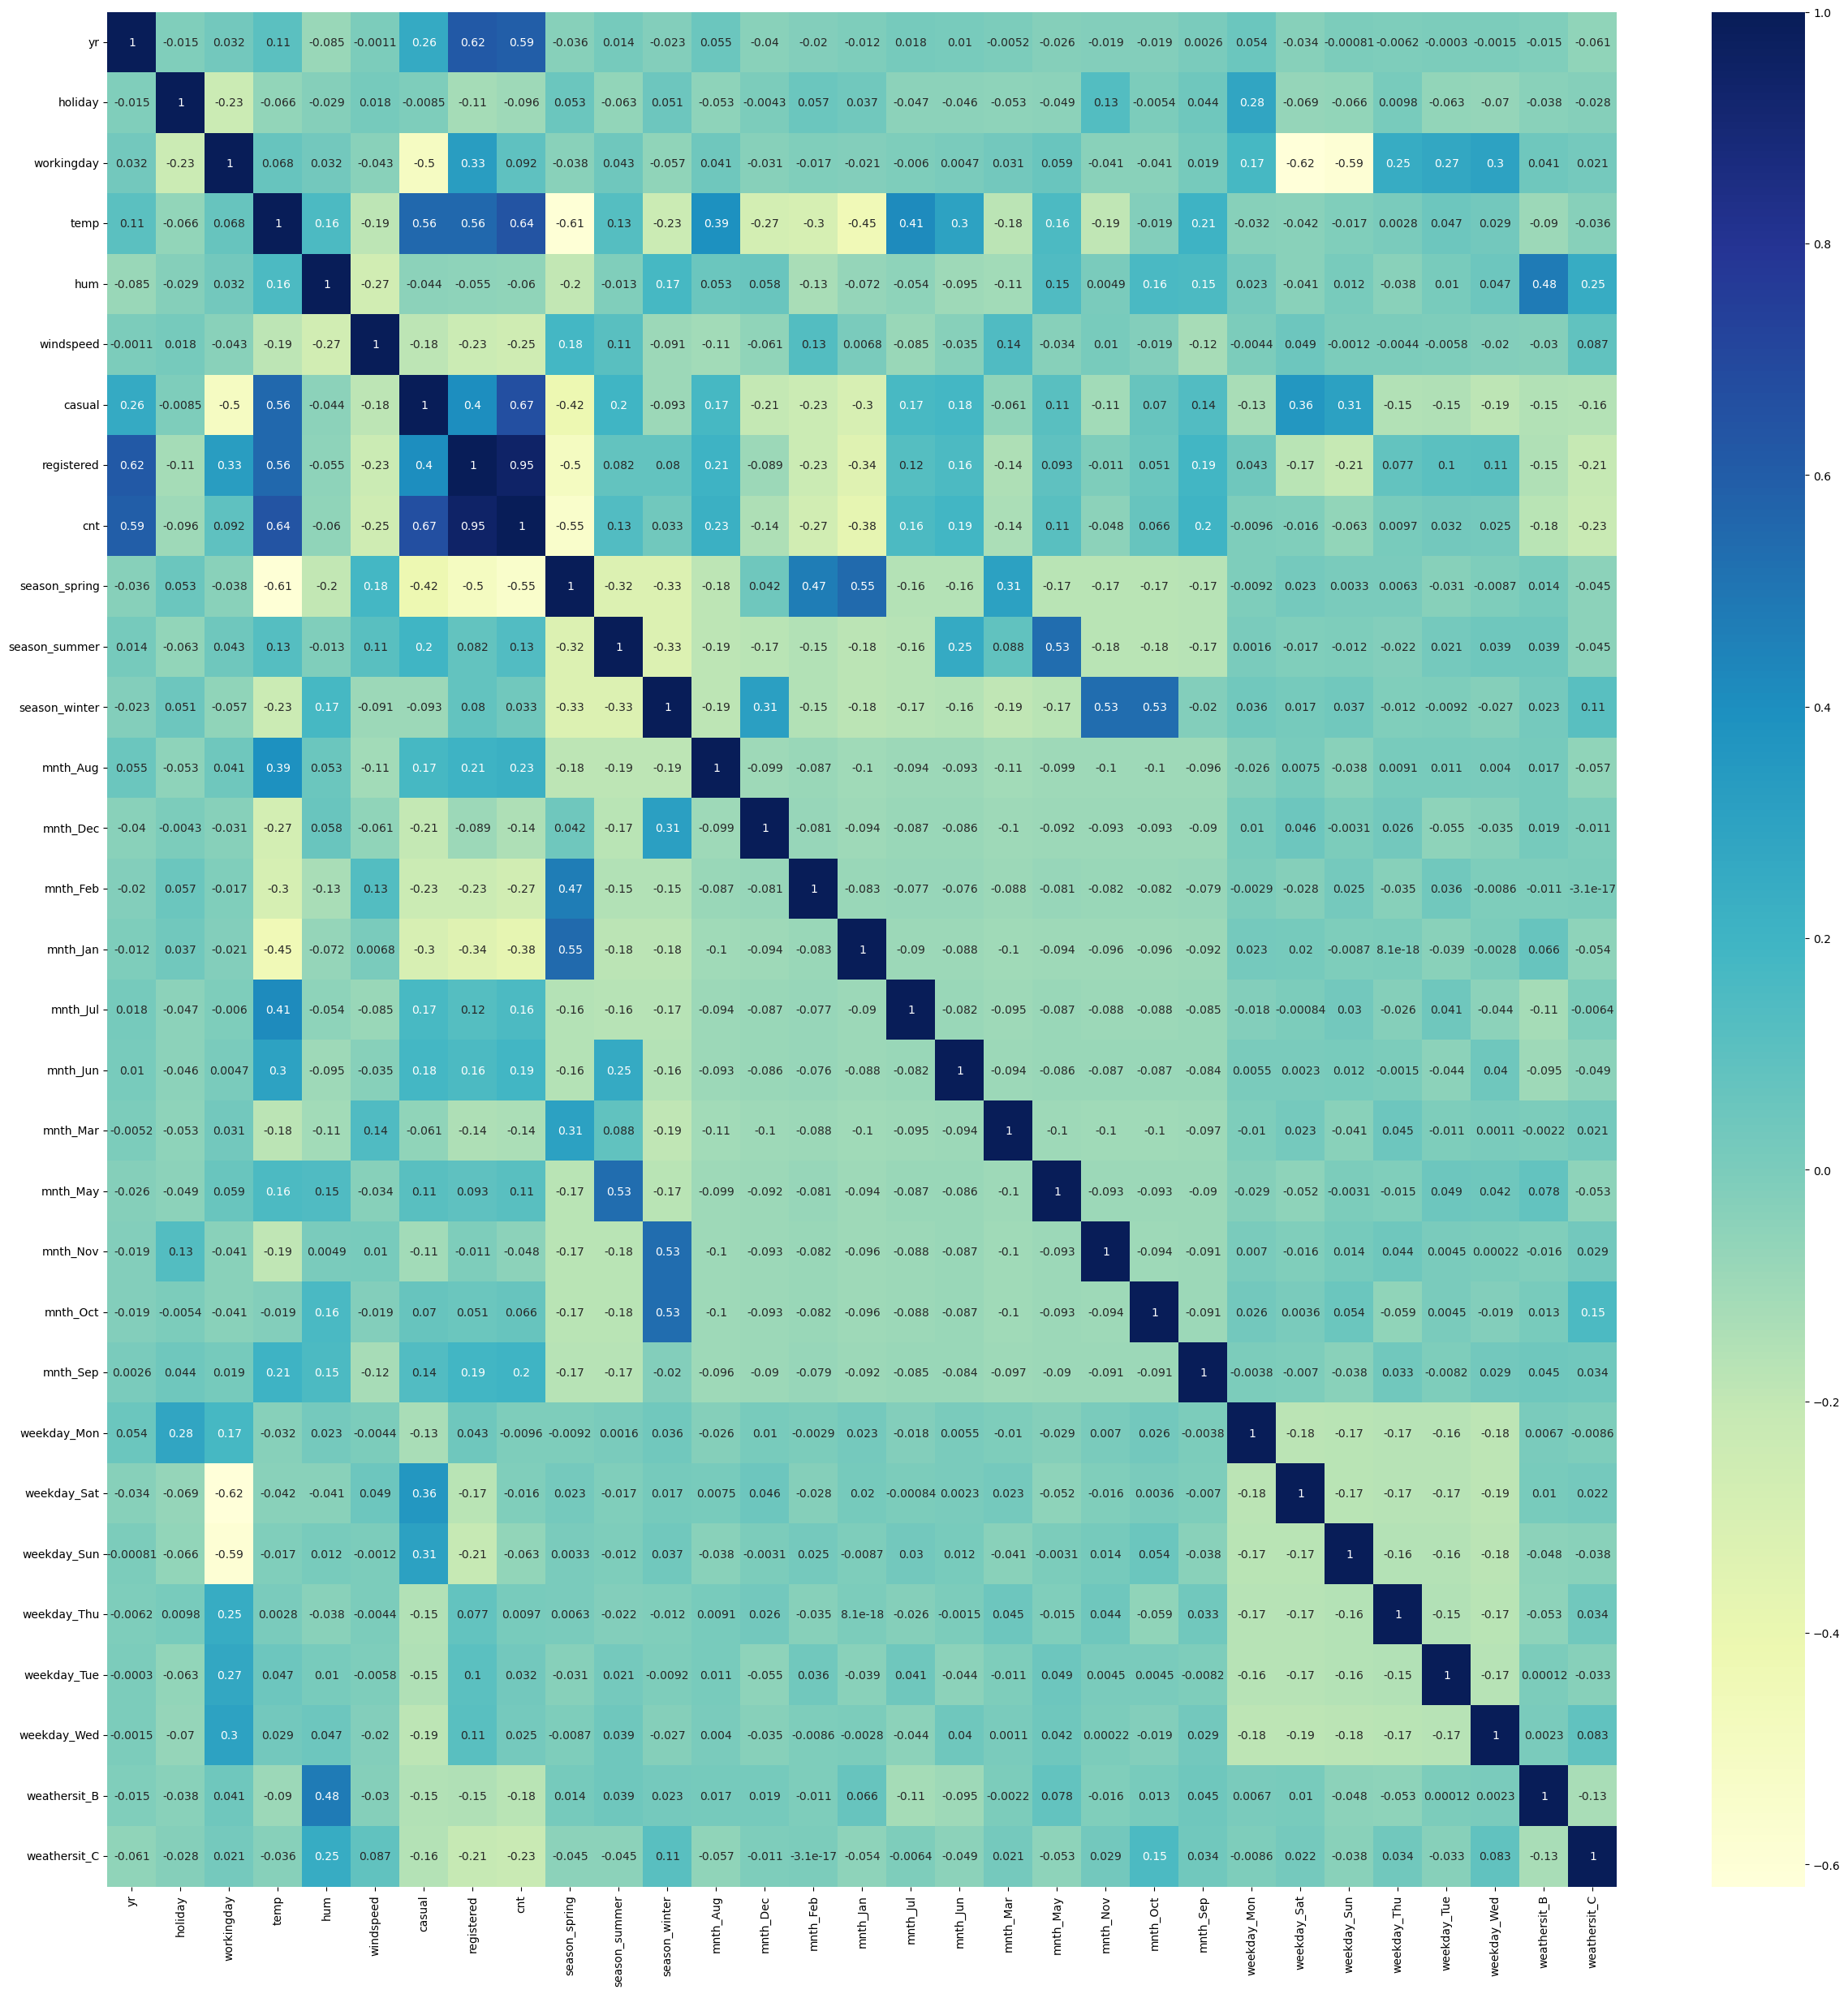

In [50]:
#checking correlation coeffecients to see which variables are highly correlated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [107]:
x_train=df_train.drop(['casual','registered','cnt'],axis=1)
y_train=df_train.pop('cnt')

In [108]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [109]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [110]:
np.array(x_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [111]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train)
lr=sm.OLS(y_train,x_train_lm).fit()
lr.params

const            0.245085
yr               0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sep         0.081060
weekday_Mon     -0.020907
weekday_Sat      0.096389
weekday_Sun      0.041853
weekday_Thu     -0.009237
weekday_Tue     -0.018890
weekday_Wed     -0.005388
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [112]:
lm=LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [113]:
print(lm.coef_)
print(lm.intercept_)

[ 0.23211572 -0.0513123   0.03561284  0.45056169 -0.15134004 -0.18645332
 -0.04815901  0.03872462  0.10584692  0.01440398 -0.0455859  -0.03228181
 -0.06277659 -0.04035007 -0.00297239  0.00104515  0.02393995 -0.04185131
  0.00753359  0.0810599  -0.02090673  0.03511753 -0.01941807 -0.00923674
 -0.01888985 -0.00538751 -0.0610664  -0.25744279]
0.3063556304566326


In [114]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          8.74e-182
Time:                        16:33:42   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep          0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon      -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat       0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sun       0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thu      -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue      -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed      -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.37e+16
================================================================

In [115]:
#import rfe
from sklearn.feature_selection import RFE

In [120]:
lm=LinearRegression()
rfe1 = RFE(lm,n_features_to_select=15) 

#fit with 20 Features
rfe1.fit(x_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True  True  True  True  True  True  True  True  True False False False
  True  True False False False False False  True False  True False False
 False False  True  True]
[ 1  1  1  1  1  1  1  1  1  6  3  4  1  1 13 14  5  2 10  1  8  1  7 11
  9 12  1  1]


In [121]:
 col =x_train.columns[rfe1.support_]

In [122]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [123]:
x_train_rfe1 = x_train [col]
x_train_lm1 = sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train,x_train_lm1).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.31e-191
Time:                        16:34:21   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949      0.000       0.180       0.322
yr                0.2305      0.008     28.807      0.000       0.215       0.246
holiday          -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday        0.0435      0.012      3.781      0.000       0.021       0.066
temp              0.5098      0.034     14.851      0.000       0.442       0.577
hum              -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed        -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring    -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer     0.0497      0.015      3.346      0.001       0.020       0.079
season_winter     0.0944      0.017      5.479      0.000       0.061       0.128
mnth_Jan         -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_Jul         -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_Sep          0.0812      0.016      4.934      0.000       0.049       0.114
weekday_Sat       0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_B     -0.0578      0.010     -5.574      0.000      -0.078      -0.037
weathersit_C     -0.2488      0.026     -9.560      0.000      -0.300      -0.198
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [124]:
x_train_rfe1.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0


In [126]:
a=x_train_lm1.drop('const',axis=1)

In [127]:
#Evaluating VIFs
vif=pd.DataFrame()
vif['features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i)for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
13,weathersit_B,2.29
0,yr,2.09
12,weekday_Sat,1.98


In [128]:
lm=LinearRegression()
rfe2 = RFE(lm,n_features_to_select=7) 

#fit with 7 Features
rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[ True False False  True  True  True  True False False False False False
 False  True False False False False False False False False False False
 False False False  True]
[ 1  2  8  1  1  1  1  6  3 14 11 12  9  1 21 22 13 10 18  4 16  7 15 19
 17 20  5  1]


In [129]:
col1 =x_train.columns[rfe2.support_]
    
x_train_rfe2 = x_train [col1]
x_train_lm2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train,x_train_lm2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.34e-178
Time:                        16:35:09   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348      0.000       0.369       0.486
yr                0.2301      0.009     26.240      0.000       0.213       0.247
temp              0.4480      0.027     16.720      0.000       0.395       0.501
hum              -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed        -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_Jul         -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_C     -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
b=x_train_lm2.drop("const",axis=1)
vif2=pd.DataFrame()
vif2['features']=b.columns
vif2['VIF']=[variance_inflation_factor(b.values,i)for i in range(b.shape[1])]
vif2['VIF']=round(vif['VIF'],2)
vif2=vif2.sort_values(by='VIF',ascending=False)
vif2

,features,VIF
4,season_spring,29.40
3,windspeed,17.77
2,hum,5.31
5,mnth_Jul,4.73
6,weathersit_C,4.53
0,yr,2.09
1,temp,1.18


In [131]:
x_train_lm2

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.605840,0.355596,0,0,0
578,1.0,1,0.863973,0.679690,0.187140,0,0,0
53,1.0,0,0.202618,0.435939,0.111379,1,0,0
350,1.0,0,0.248216,0.577930,0.431816,0,0,0


In [141]:

y_train_cnt = lm2.predict(x_train_lm2)


In [142]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [143]:
y_train_cnt

653    0.685358
576    0.703215
426    0.500206
728    0.361883
482    0.674481
         ...   
526    0.807623
578    0.842281
53     0.241683
350    0.310340
79     0.342262
Length: 510, dtype: float64

In [144]:
x_train_rfe2

,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1,0.509887,0.575354,0.300794,0,0,0
576,1,0.815169,0.725633,0.264686,0,1,0
426,1,0.442393,0.640189,0.255342,1,0,0
728,1,0.245101,0.498067,0.663106,1,0,0
482,1,0.395666,0.504508,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1,0.824514,0.605840,0.355596,0,0,0
578,1,0.863973,0.679690,0.187140,0,0,0
53,0,0.202618,0.435939,0.111379,1,0,0
350,0,0.248216,0.577930,0.431816,0,0,0


<Axes: ylabel='Density'>

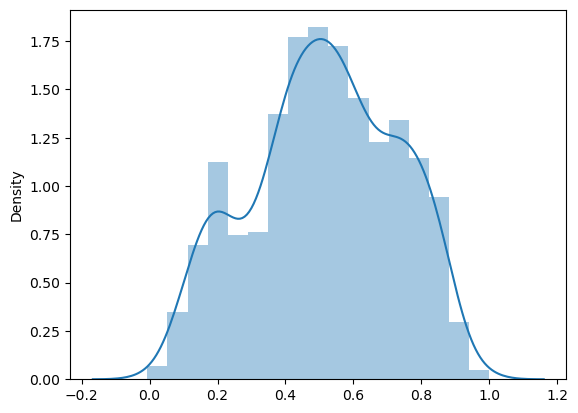

In [145]:
fig=plt.figure()
sns.distplot((y_train,y_train_cnt))


In [149]:
df_test

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0.933557,0.427086,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.265163,0.767976,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.072539,0.346376,0,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.268820,0.559630,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.223712,0.608143,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.257562,0.708888,0.287411,0.096312,0.376697,1,0,...,0,0,0,0,1,0,0,0,1,0
702,1,0,1,0.519232,0.756118,0.283397,0.167327,0.871354,0,0,...,0,0,0,0,0,0,1,0,0,0
127,0,0,0,0.584649,0.650923,0.069510,0.426394,0.420445,0,1,...,0,0,0,0,1,0,0,0,0,0
640,1,0,1,0.745598,0.817947,0.052115,0.221274,0.985273,0,0,...,1,0,0,0,0,0,0,1,1,0


In [150]:
y_test


184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [151]:
x_test=df_test.drop(["casual","registered"],axis=1)

In [152]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [153]:
c = x_train_lm2

In [154]:
x_train_lm2

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0
...,...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.605840,0.355596,0,0,0
578,1.0,1,0.863973,0.679690,0.187140,0,0,0
53,1.0,0,0.202618,0.435939,0.111379,1,0,0
350,1.0,0,0.248216,0.577930,0.431816,0,0,0


In [155]:
col2=c.columns
col2

Index(['const', 'yr', 'temp', 'hum', 'windspeed', 'season_spring', 'mnth_Jul',
       'weathersit_C'],
      dtype='object')

In [156]:
x_test_lm2 = sm.add_constant(x_test)

In [157]:
x_test_rfe2=x_test_lm2[col2]

In [158]:
x_test_rfe2

,const,yr,temp,hum,windspeed,season_spring,mnth_Jul,weathersit_C
184,1.0,0,0.831783,0.657364,0.084219,0,1,0
535,1.0,1,0.901354,0.610133,0.153728,0,0,0
299,1.0,0,0.511964,0.837699,0.334206,0,0,0
221,1.0,0,0.881625,0.437098,0.339570,0,0,0
152,1.0,0,0.817246,0.314298,0.537414,0,0,0
...,...,...,...,...,...,...,...,...
400,1.0,1,0.257562,0.708888,0.287411,1,0,0
702,1.0,1,0.519232,0.756118,0.283397,0,0,0
127,1.0,0,0.584649,0.650923,0.069510,0,0,0
640,1.0,1,0.745598,0.817947,0.052115,0,0,0


In [159]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   hum            219 non-null    float64
 4   windspeed      219 non-null    float64
 5   season_spring  219 non-null    int32  
 6   mnth_Jul       219 non-null    int32  
 7   weathersit_C   219 non-null    int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 12.8 KB


In [160]:
y_pred=lm2.predict(x_test_rfe2)

In [161]:
y_pred

184    0.534284
535    0.882705
299    0.385991
221    0.647101
152    0.607016
         ...   
400    0.394215
702    0.649536
127    0.518276
640    0.783796
72     0.262059
Length: 219, dtype: float64

In [162]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

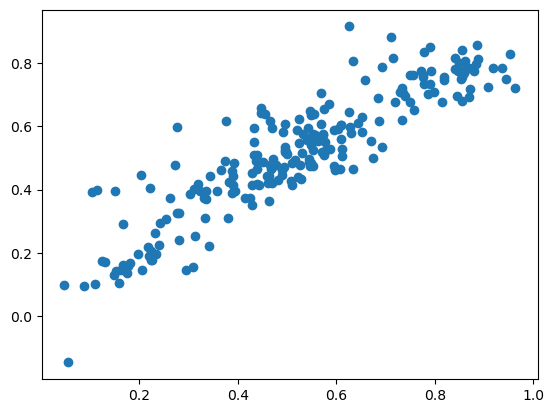

In [163]:
plt.figure()
plt.scatter(y_test,y_pred)

In [164]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          2.34e-178
Time:                        16:41:09   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348      0.000       0.369       0.486
yr                0.2301      0.009     26.240      0.000       0.213       0.247
temp              0.4480      0.027     16.720      0.000       0.395       0.501
hum              -0.2412      0.033     -7.324      0.000      -0.306      -0.176
windspeed        -0.2066      0.027     -7.591      0.000      -0.260      -0.153
season_spring    -0.1487      0.013    -11.498      0.000      -0.174      -0.123
mnth_Jul         -0.0901      0.018     -4.945      0.000      -0.126      -0.054
weathersit_C     -0.1867      0.027     -6.933      0.000      -0.240      -0.134
==============================================================================
Omnibus:                       45.817   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.848
Skew:                          -0.547   Prob(JB):                     8.40e-20
Kurtosis:                       4.714   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8052379667298357